# Vectors and Matrices: Topic Modeling in Python

## Bonus: Topic Modeling

This Notebook serves as an introduction to the more advanced features of text mining. We will apply topic modelling, clustering and supervised classification to speeches taken from the records of the British House of Commons. 

The dataset below contains a CSV file in which each line records a mention of immigration, with associated metadata (party, date etc.)

We can load the data with Pandas from the disk into our Notebook:

In [133]:
# import the pandas library`
import pandas as pd

dateparse = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')

# read the CSV file as assign 
df = pd.read_csv('data/immigration_uk.csv',
                       header=0, # specify where the header is located
                       sep=",", # specify the delimiter
                       # additional 
                       escapechar=u'\\', # quotes inside the text are escaped
                       parse_dates=['date'], # which column contains dates
                       date_parser = dateparse # how to read dates
                      )


The `.head()` method prints the first lines of table:

In [134]:
df.head(3)

,id,index,type,score,date,speaker,party,function,role,paragraphs_count,house,text
0,uk.proc.d.1976-08-04.21.1.6,uk.proc,speech,1,1976-08-04,Mrs. Millie Miller,Labour,NaN,mp,17,commons,and when the time comes when it is suggested ...
1,uk.proc.d.1976-08-04.21.1.16,uk.proc,speech,1,1976-08-04,Mr. Anthony Berry,Conservative,NaN,mp,12,commons,given to residents to carry on industrial mac...
2,uk.proc.d.1976-08-04.21.1.25,uk.proc,speech,1,1976-08-04,Mr. Finsberg,Conservative,NaN,mp,27,commons,now 12·6 per cent. In Poplar it is 14·9 per c...


Below we use the Pandas syntax to select specific rows:
    - speeches from Labour and Conservative speakers
    - speches after 2005-05-04
    
`.shape` returns the number of rows and columns.

In [168]:
df_red = df[df.party.isin(['Labour','Conservative']) & (df.date >= '2005-05-04')]
print(df.shape)
print(df_red.shape)

(10000, 12)
(1765, 12)


Now we convert two columns `text` and `party` to a Python list using the `list()` function.

In [169]:
texts = list(df_red.text)
parties = list(df_red.party)

Then we properly tokenize the each speech, i.e. separate words and delete punctuation as in the example below.

In [170]:
from nltk.tokenize import regexp_tokenize
sentence = 'This example, will be: properly tokenized!'
tokens = regexp_tokenize(sentence,pattern='\w+')
print(tokens)

['This', 'example', 'will', 'be', 'properly', 'tokenized']


Let's apply tokenization to each speech and save it in the list `tokenized_speeches`:

In [171]:
# code is rather hacky, but hey it works!
tokenized_speeches = []


for speech in texts: 
    speech_lower = speech.lower() # lowercase each book
    tokens = regexp_tokenize(speech_lower,pattern='\w+') # seperate words 
    tokenized_speeches.append(tokens) # add the sonnet to long poems
    
            
print(len(tokenized_speeches))

1765


Our topic modelling, and other algorithms, require a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix) as input.
This matrix is a table where each row represents a document, and a each column represents the frequency of one specific work.

To create such a matrix we have to list all types (distinct words), which is often called a **vocabulary**. The vocabulary will define the column names (e.g. each column keeps track of how often one word appears accross *all* documents.

To create the vocabulary we first join all the speeches, tokenize it, and use the Python `set()` function to remove all duplicates. This returns a set with all the types in the corpus.

As you can see the number of tokens is way smaller than the number of types (here defined by the variable `vocab`).

In [172]:
# tokenize the whole text at one
all_tokens = regexp_tokenize(' '.join(texts).lower(),pattern='\w+')
print(len(all_tokens))
vocab = set(all_tokens)
print(len(vocab))

111859
7499


As said earlier `set()` transforms a list to unordered set and thereby removes all duplicates as in the example below. 

In [173]:
# print the hundred first items of list(set())
print(list(all_tokens)[:100])

['em', 'immigration', 'em', 'treatment', 'of', 'claimants', 'etc', 'act', '2004', 'the', 'bill', 'is', 'concerned', 'with', 'the', 'regulation', 'of', 'the', 'affairs', 'of', 'businesses', 'and', 'consumer', 'protection', 'and', 'the', 'provision', 'under', 'discussion', 'covers', 'entry', 'into', 'premises', 'to', 'obtain', 'information', 'in', 'relation', 'to', 'fitness', 'to', 'hold', 'a', 'consumer', 'credit', 'licence', 'it', 'is', 'therefore', 'not', 'in', 'the', 'same', 'league', 'as', 'the', 'other', 'legislation', 'world', 'and', 'towards', 'sub', 'saharan', 'africa', 'welcoming', 'a', 'tide', 'of', 'millions', 'of', 'em', 'immigrants', 'em', 'from', 'there', 'a', 'substantial', 'number', 'perhaps', 'more', 'than', '100', '000', 'remain', 'in', 'libya', 'and', 'they', 'have', 'very', 'little', 'by', 'way', 'of', 'resources', 'as', 'has', 'been', 'said', 'they']


In text mining text stop words are often discarded as they are not considered informative for the specific task. Removing stop words can be easily done using a membership condition in combination with the NLTK `stopwords` list.

In [159]:
from nltk.corpus import stopwords
stopw = stopwords.words('english') # get a list of stop words from an external library
print(stopw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [174]:
vocab_f = []
print(len(vocab))
for w in vocab: # iterate over all the tokens in all_tokens
    if w not in stopw: # if an items is alphanumeric 
        vocab_f.append(w)
print(len(vocab_f))

7499
7369


A better approach would be to remove word that appear in more or less than a number of documents. To do this, we first map each word to its document frequency. The threshold we set for removing words are arbitrary, but motivated by the intuition that we want to ignore words that are too frequent or too rare, as these will mess up our models later.

In [175]:
from collections import Counter

unique_tokens_all = [] # we we store the types of each document

for speech in tokenized_speeches: # go over all the speeches
    unique_tokens_speech = list(set(speech)) # make list from the set of unique words in a book
    unique_tokens_all.extend(unique_tokens_speech) # add the words to the list unique_words_all, not that we extend() and not append()

doc_freq = Counter(unique_tokens_all)  # use Counter to convert list to a document frequency
doc_freq.most_common(10)

[('em', 1765),
 ('the', 1747),
 ('immigration', 1576),
 ('to', 1519),
 ('and', 1463),
 ('of', 1444),
 ('that', 1409),
 ('in', 1204),
 ('a', 1106),
 ('is', 1015)]

Now we repeat the vocab filtering. You'll notice that this time the vocabulary is heavily reduced. 
To set a value for the maximum document frequency, we multiplicate the number of documents by 0.75 (i.e. divide by 100 and multiply by 75 so we keep words that appear in less than 75% of all the speeches) and then cast this float as an integer using `int()`.

In [188]:
vocab_f = []
upper = int(len(texts)*0.75)
print('Maximum document frequency = ' + str(upper))

for w in vocab: # iterate over all the tokens in all_tokens
    if doc_freq.get(w,0) > 5 and doc_freq.get(w,0) < upper and w.isalpha(): # if an items is alphanumeric 
        vocab_f.append(w)
vocab = list(vocab)

Maximum document frequency = 1323


In [189]:
print('Length of vocabulary before filtering = '+ str(len(vocab)))
print('Length of vocabulary before filtering = '+ str(len(vocab_f)))

Length of vocabulary before filtering = 7499
Length of vocabulary before filtering = 1688


Some example of the words in our vocabulary:

In [191]:
print(vocab_f[:100])

['nobody', 'independent', 'perfectly', 'skilled', 'six', 'domestic', 'begin', 'whole', 'track', 'kind', 'extra', 'chair', 'centres', 'determine', 'decided', 'covered', 'elsewhere', 'congratulate', 'south', 'everything', 'debt', 'watch', 'couple', 'medical', 'chaos', 'economically', 'bill', 'mass', 'short', 'she', 'mark', 'pass', 'agreement', 'chamber', 'vulnerable', 'firm', 'applications', 'shown', 'slightly', 'decade', 'part', 'number', 'subject', 'july', 'himself', 'facts', 'visas', 'others', 'policies', 'hand', 'presented', 'supported', 'rightly', 'each', 'politicians', 'another', 'grounds', 'exactly', 'managed', 'minister', 'care', 'details', 'commend', 'aspects', 'support', 'knowledge', 'figure', 'use', 'promises', 'task', 'who', 'system', 'contributions', 'leader', 'discussions', 'reply', 'office', 'simple', 'given', 'asking', 'controlled', 'concern', 'highlighted', 'investigate', 'cover', 'applies', 'houses', 'purposes', 'were', 'responsibility', 'building', 'try', 'putting', 's

Now we will transform all the books to a **count vector**: a list where each value indicates how often a word appears (int) or not (0):

In [186]:
# Let's take a random example
example = tokenized_speeches[30]
print(example)

['department', 'for', 'international', 'development', 'also', 'have', 'an', 'interest', 'in', 'what', 'is', 'happening', 'in', 'this', 'terrible', 'trade', 'the', 'hon', 'member', 'for', 'north', 'southwark', 'and', 'bermondsey', 'simon', 'hughes', 'asked', 'about', 'the', 'position', 'of', 'the', 'sri', 'lankan', 'tamils', 'i', 'have', 'been', 'informed', 'that', 'the', 'border', 'and', 'em', 'immigration', 'em', 'agency', 'is', 'actively', 'engaging', 'with', 'detainees', 'to', 'discuss', 'their', 'concerns', 'the']


Let's compute the word counts of the this segment:

In [181]:
fd_s = Counter(example)
print(fd_s)

Counter({'the': 5, 'for': 2, 'have': 2, 'in': 2, 'is': 2, 'and': 2, 'em': 2, 'department': 1, 'international': 1, 'development': 1, 'also': 1, 'an': 1, 'interest': 1, 'what': 1, 'happening': 1, 'this': 1, 'terrible': 1, 'trade': 1, 'hon': 1, 'member': 1, 'north': 1, 'southwark': 1, 'bermondsey': 1, 'simon': 1, 'hughes': 1, 'asked': 1, 'about': 1, 'position': 1, 'of': 1, 'sri': 1, 'lankan': 1, 'tamils': 1, 'i': 1, 'been': 1, 'informed': 1, 'that': 1, 'border': 1, 'immigration': 1, 'agency': 1, 'actively': 1, 'engaging': 1, 'with': 1, 'detainees': 1, 'to': 1, 'discuss': 1, 'their': 1, 'concerns': 1})


Now we iterate over our filtered vocabulary, for each word in the vocabulary, we get the frequency of that word in our example text. The size of the vector is naturally equal to the number of words in our vocabulary.

In [183]:
vector = []
for w in vocab_f:
    count = fd_s.get(w,0)
    vector.append(count)
print(len(vector))
print(len(vector) == len(vocab_f))

1688
True


A vector is actually nothing more than a list with a lot of zeros and a few integers that tell us how often a word at position x in our vocab appears. A vector simply represents the word counts of a document with respect to a certain vocabulary.

In [165]:
print(vector) # prints the total vector for all the sonnets

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [196]:
print(vocab_f[40]) # the word "part" at position 40
print(vector[40]) # does not appeat in the example

part
0


Now we transform our corpus to a **document-term-matrix**: A matrix where the rows represent songs, and columns the presence of a word. The matrix is nothing more than a nested list: a list to which we append all the vectors.

In [197]:
matrix = [] # create an empty list that will serve as a matrix. here we store our vectors
for tokens in tokenized_speeches:
    vector = [] # create an empty vector
    freqdist = Counter(tokens) # compute word frequencies
    
    for w in vocab_f: # iterate over the vocabulary    
        vector.append(freqdist.get(w,0)) # append the word frequency for word w otherwise append zero
    matrix.append(vector) # append vector to the matrix
            
print(len(matrix) == len(tokenized_speeches)) # number of rows in the matrix is equal to the number of books
print(len(matrix[0]) == len(vocab_f)) # dimensions of the vector is equal to the total vocabulary

True
True


In [ ]:
Once we have this document term matrix, we can feed our data to other algorithms

### [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)

We can discover thematical clusters using Hierarchical Clustering.

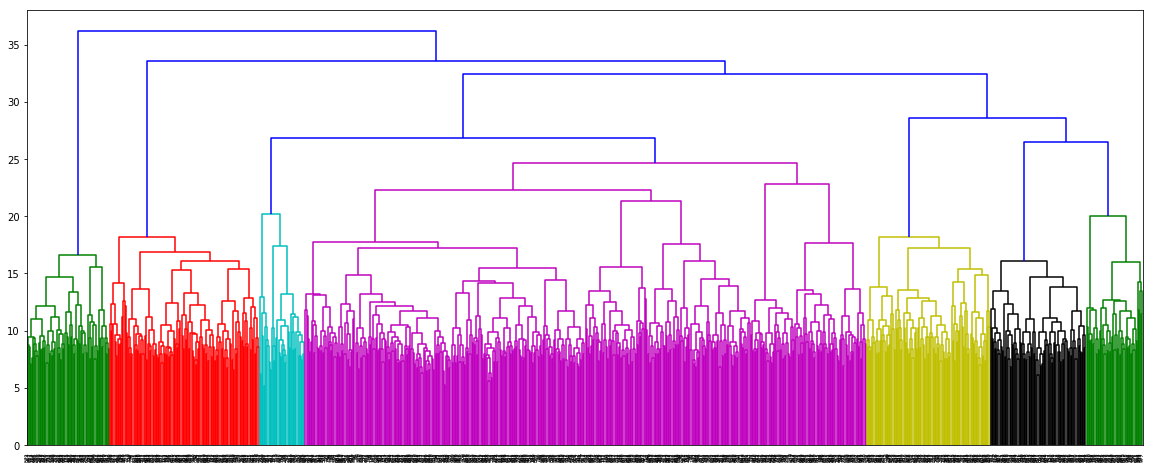

In [167]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
%matplotlib inline
dm = pdist(matrix[:1000]) # we reduce our data, otherwise it does not fit on the plot
Z = hierarchy.ward(dm) # convert document term matrix to a distance matrix which how close each vector pair is
plt.figure(figsize=(20,8)) # we make the figure a bit bigger
dn = hierarchy.dendrogram(Z) # we plot the dendogram

## [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (Topic Modelling)
<img src="http://wiki.ubc.ca/images/thumb/1/15/Illustrating_LDA.jpg/700px-Illustrating_LDA.jpg"/>

We can train a topic model on the document-term matrix, which aims to recover the latent topics in a corpus. The algorithm is sensitive to document frequency threshold and the number of topics you select. You can play a bit with these parameters and see what happens.

In [116]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=20, #maybe n_components, this defines the number of topics we want to find
                                max_iter=10, # how often should the algorithm iterate over the corpus
                                learning_method='online',
                                random_state=0, # in order to be able to reproduce the results
                                verbose=5, # how many prints during training?
                                n_jobs=5) # set the number of cores Python can use, makes the training faster
lda.fit(matrix)

[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]

[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]

[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]

[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=5, n_topics=20, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=5)

The code below helps you to print the different topics, which are a list of words on each line, words that tend to co-occur in documents.

In [117]:
# Example takes from: http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda, vocab_f, 10)

Topic #0: police officers powers service customs staff line uk services documents
Topic #1: crime organised drugs towards arguments liberal intelligence against terrorist world
Topic #2: today involved document authority tory word according class fairer part
Topic #3: hope decision scheme may form tonight fear he former exactly
Topic #4: in i a is it have on we for not
Topic #5: are they in is be people we who will immigrants
Topic #6: legal person cases review paper white appeals aid longer appeal
Topic #7: on bill will house be debate a business for motion
Topic #8: in for local immigrants constituency population from immigrant authorities per
Topic #9: move beg birmingham sparkbrook ability reducing smuggling above value highlighted
Topic #10: hon for member my friend mr right she at was
Topic #11: part concern once entirely provided scale front deals interruption insurance
Topic #12: identity cards british hong kong based id illegal card fraud
Topic #13: united kingdom rules in a a

## [Supervised Classification](https://en.wikipedia.org/wiki/Supervised_learning)

We can also build a classifier that can detect whether a speech is Left of Right. For this we use supervised classification.

For supervised classification we need labeled data, in this case each speech has a party associated with the text.

Building a classifier model, broadly consists of two steps:
**Training**: we give the computer some examples of texts with correct labels. From these examples it can learn a relation between certain words and the label, such "illegal" appears more in Conservative speeches.
**Testing**: we test the model on new examples, and assess how well the computer can guess or predict the labels of the texts we asked it to classify.

<img src="http://www.nltk.org/images/supervised-classification.png"/>

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.cross_validation import train_test_split
import numpy as np
import random


y = np.array([1 if p=='Labour' else 0 for p in parties]) # y is the vector of labels, 0 is Conservative, 1 is Labour

X_train, X_test, y_train, y_test = train_test_split(
                    matrix, y, test_size=0.33, random_state=42) # we divide the data into a training (66%) and test set (33%)

classifier = LinearSVC(class_weight='balanced',C=1)  # we create a classifier
classifier.fit(X_train,y_train) # we fit the model or train the classifier
predictions = classifier.predict(X_test) # we let it predict the labels of new examples
print(f1_score(y_test,predictions),accuracy_score(y_test,predictions)) # we compute how well it could predict the labels of new instances.
print(classification_report(y_test,predictions))

0.553791887125 0.566037735849
             precision    recall  f1-score   support

          0       0.59      0.56      0.58       307
          1       0.54      0.57      0.55       276

avg / total       0.57      0.57      0.57       583



In [200]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    top10 = np.argsort(clf.coef_[0])[-10:]
    print("%s: %s" % ('Labour',
              " ".join(feature_names[j] for j in top10)))
    top10 = np.argsort(clf.coef_[0])[:10]
    print("%s: %s" % ('Conservative',
              " ".join(feature_names[j] for j in top10)))
        
print_top10(vocab_f, classifier, [0,1])

Labour: development specific extension interests took protection confident quite resources use
Conservative: check add delighted whole lady original sense least massive shadow
